# Survival Analysis: Kaplan-Meier

## Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes 
from lifelines import CoxPHFitter   
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


$ \large D_t = \frac{d_t}{n_t} \qquad $
$\large S_t = 1 - \frac{d_t}{n_t} $  
  
$\large \hat{S_t} = \prod_{i=1}^t \;\; 1 - \frac{d_i}{n_i} $   

 ![](img/censored.png) ![](img/kaplan_meier.png)

## Simple example

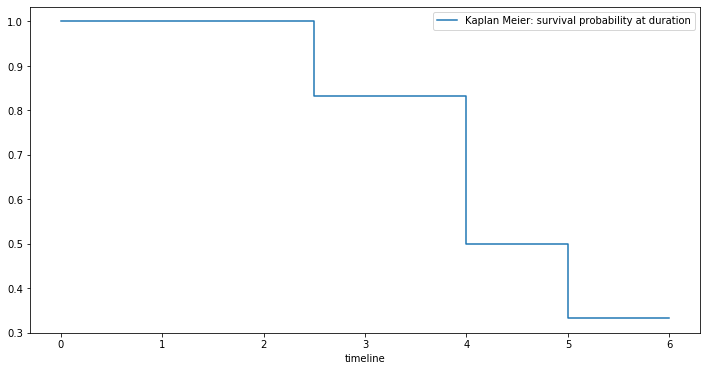

In [24]:
durations = [5,6,6,2.5,4,4]
event_observed = [1, 0, 0, 1, 1, 1]

kmf = KaplanMeierFitter() 
kmf.fit(durations, event_observed, label='Kaplan Meier: survival probability at duration')
kmf.plot(ci_show=False);

## Kaplan-meier with customer churn data

In [24]:
df = pd.read_csv('D:/data/csv/telco_customer-churn_cleansed.csv') 

### Overall Kaplan-Meier

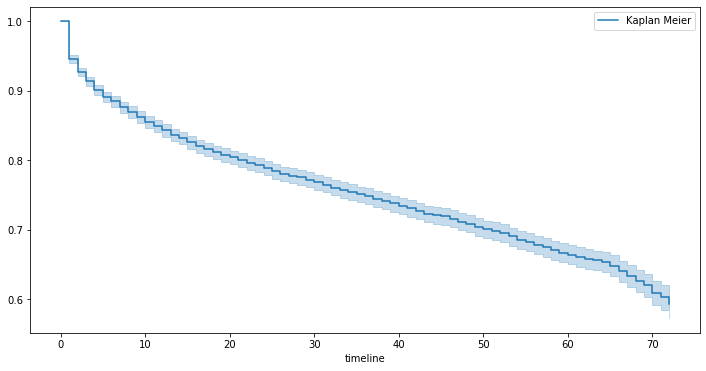

In [25]:
durations = df['tenure'] 
event_observed = df['Churn'] 

km = KaplanMeierFitter()
km.fit(durations, event_observed,label='Kaplan Meier')
km.plot();

### Segmented Kaplan-Meier

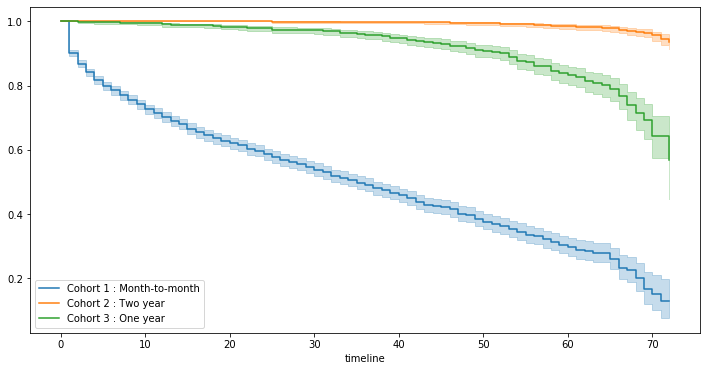

In [26]:
kmf = KaplanMeierFitter() 

Time = df['tenure']     
Event = df['Churn']      
            
coh1 = (df['Contract'] == 'Month-to-month')   
coh2 = (df['Contract'] == 'Two year')         
coh3 = (df['Contract'] == 'One year')         


kmf.fit(Time[coh1], Event[coh1], label='Cohort 1 : Month-to-month')    
ax = kmf.plot()

kmf.fit(Time[coh2], Event[coh2], label='Cohort 2 : Two year')         
ax1 = kmf.plot(ax=ax)

kmf.fit(Time[coh3], Event[coh3], label='Cohort 3 : One year')        
kmf.plot(ax=ax1);                                 

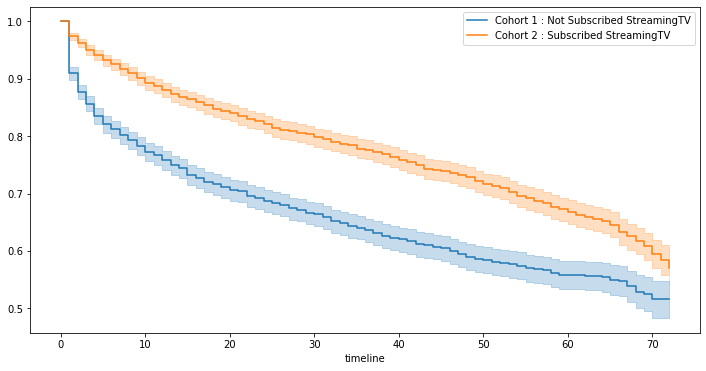

In [27]:
kmf1 = KaplanMeierFitter() 
 
coh1 = (df['StreamingTV']  == 'No')     
coh2 = (df['StreamingTV']  == 'Yes')     

kmf1.fit(Time[coh1], Event[coh1], label='Cohort 1 : Not Subscribed StreamingTV')
a1 = kmf1.plot()

kmf1.fit(Time[coh2], Event[coh2], label='Cohort 2 : Subscribed StreamingTV')
kmf1.plot(ax=a1);

## Cox Proportional Hazards

Prepare data: select relevant variables and take dummies

In [33]:
df_r= df.loc[:,['tenure','Churn','gender','Partner','Dependents','PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']]
df_r.head()

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,0,Female,Yes,No,No,29.85,0,No
1,34,0,Male,No,No,Yes,56.95,0,No
2,2,1,Male,No,No,Yes,53.85,0,No
3,45,0,Male,No,No,No,42.30,0,No
4,2,1,Female,No,No,Yes,70.70,0,No


In [34]:
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,29.85,0,0,1,0,0,0,0
1,34,0,56.95,0,1,0,0,1,0,0
2,2,1,53.85,0,1,0,0,1,0,0
3,45,0,42.30,0,1,0,0,0,0,0
4,2,1,70.70,0,0,0,0,1,0,0


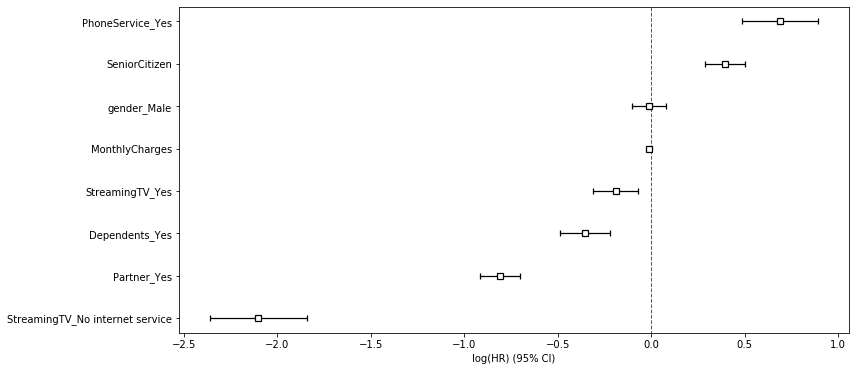

In [35]:
cph = CoxPHFitter()   
cph.fit(df_dummy, duration_col ='tenure', event_col='Churn') 
cph.print_summary()    
cph.plot();
#dir(cph) #check methods available

In [36]:
tr_rows = df_dummy.iloc[5:10, 2:]
tr_rows

,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
5,99.65,0,0,0,0,1,0,1
6,89.10,0,1,0,1,1,0,1
7,29.75,0,0,0,0,0,0,0
8,104.80,0,0,1,0,1,0,1
9,56.15,0,1,0,1,1,0,0


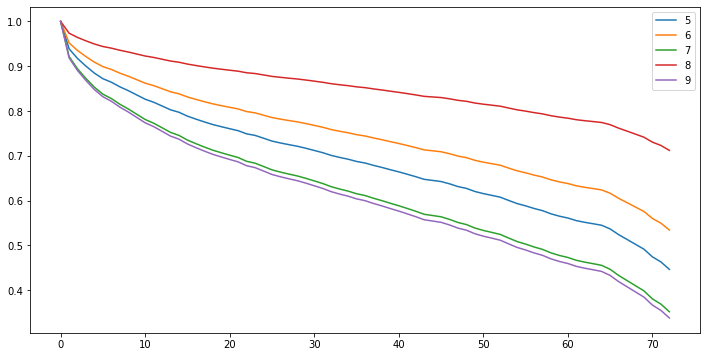

In [37]:
sf = cph.predict_survival_function(tr_rows)
sf.plot();

## Credits & Links

https://github.com/anurag-code/Survival-Analysis-Intuition-Implementation-in-Python
https://www.kaggle.com/blastchar/telco-customer-churn/